<a href="https://colab.research.google.com/github/AayushmanGupta123/C-121-Working-HW/blob/main/C_117HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
data = files.upload()

Saving BankNote_Authentication.csv to BankNote_Authentication.csv


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("BankNote_Authentication.csv")
print(df.head())

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [ ]:
from sklearn.model_selection import train_test_split
Y = df["class"]
X = df[['variance','skewness','curtosis','entropy']]
Ytrain,Ytest,Xtrain,Xtest = train_test_split(Y,X,test_size = 0.25,random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
Xtrain = scx.fit_transform(Xtrain)
Xtest = scx.transform(Xtest)
classifier2 = LogisticRegression(random_state = 0)
classifier2.fit(Xtrain,Ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
Yprediction1 = classifier2.predict(Xtest)
predictedvalues1 = []
for i in Yprediction1:
  if i == 0:
    predictedvalues1.append("Authorised")
  else:
    predictedvalues1.append("Forged")

actualvalues1 = []
for i in Ytest.ravel():
  if i == 0:
    actualvalues1.append("Authorised")
  else:
    actualvalues1.append("Forged")

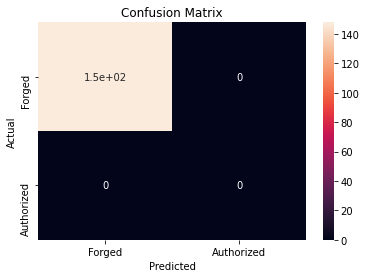

In [ ]:
labels = ["Forged", "Authorized"]
cm = confusion_matrix(actualvalues1,predictedvalues1,labels)
ax = plt.subplot()
sns.heatmap(cm,annot = True,ax = ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels);
ax.yaxis.set_ticklabels(labels);

In [ ]:
tn,fp,fn,tp = confusion_matrix(Ytest,Yprediction1).ravel()
print("True Negatives: ",tn)
print("True Positive: ",tp)
print("False Negatives: ",fn)
print("False Positive: ",fp)
Accuracy = (tn+tp)*100/(tp+tn+fp+fn)
print("Accuracy: ",Accuracy)

True Negatives:  188
True Positive:  148
False Negatives:  0
False Positive:  7
Accuracy:  97.95918367346938
